**Kimlik Doğrulama**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Lokalizasyon (Yerelleştirme) İşlemi**

In [ ]:
!mkdir -p drive
!ls

drive  sample_data


**Dosya Yerini Belirleme İşlemi**

In [ ]:
import os
os.chdir("/content/drive/MyDrive/DDI")
!pwd


/content/drive/MyDrive/DDI


**Gerekli Kütüphanelerin Yüklenmesi**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from warnings import filterwarnings
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from textblob import Word, TextBlob
from wordcloud import WordCloud
#!pip install xgboost
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from warnings import filterwarnings
filterwarnings('ignore')

**Verilerin Yüklenmesi**

In [ ]:
verisetiDf=pd.read_csv("/content/drive/MyDrive/DDI/IMDBDataset.csv")
print(verisetiDf.shape)

(50000, 2)


In [ ]:
verisetiDf.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
print(verisetiDf.columns)

Index(['review', 'sentiment'], dtype='object')


In [ ]:
verisetiDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
verisetiDf1Preprocessing = pd.DataFrame()
verisetiDf2Preprocessing = pd.DataFrame()
verisetiDf1Preprocessing["Gorus"] = verisetiDf["review"]

verisetiDf2Preprocessing["Durumu"] = verisetiDf['sentiment']


In [ ]:
verisetiDf1Preprocessing['Gorus']


0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: Gorus, Length: 50000, dtype: object

In [ ]:
verisetiDf2Preprocessing["Durumu"]


0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: Durumu, Length: 50000, dtype: object

**Veri Ön İşleme**

Büyük-Küçük Harf Dönüşümü

In [ ]:
verisetiDf1Preprocessing['Gorus'] = verisetiDf1Preprocessing['Gorus'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
verisetiDf1Preprocessing = pd.DataFrame(verisetiDf1Preprocessing, columns = ["Gorus"])

In [ ]:
verisetiDf1Preprocessing['Gorus'] = verisetiDf1Preprocessing['Gorus'].str.replace('[^\w\s]','')
verisetiDf1Preprocessing.head(5)

,Gorus
0,one of the other reviewers has mentioned that ...
1,a wonderful little production br br the filmin...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...


**Etkisiz Kelimelerin (Stop Words) Silinmesi**

In [ ]:
print(type(verisetiDf1Preprocessing)) #<class 'pandas.core.series.Series'>

<class 'pandas.core.frame.DataFrame'>


In [ ]:
verisetiDf1Preprocessing = pd.DataFrame(verisetiDf1Preprocessing, columns = ["Gorus"])
#Sayıların silinmesi esnasında Series olan Verisetini tekrardan DataFrame'e dönüştürür
print(type(verisetiDf1Preprocessing)) #<class 'pandas.core.frame.DataFrame'>
verisetiDf1Preprocessing.head(5)

<class 'pandas.core.frame.DataFrame'>


,Gorus
0,one of the other reviewers has mentioned that ...
1,a wonderful little production br br the filmin...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...


In [ ]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')
verisetiDf1Preprocessing['Gorus'] = verisetiDf1Preprocessing['Gorus'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




**Az Geçen Kelimelerin Silinmesi:**







In [ ]:

kelimeSayilari = pd.Series(" ".join(verisetiDf1Preprocessing).split()).value_counts() #Metinde her kelimenin kaç defa geçtiğini verir
print(kelimeSayilari)
silinecekler = pd.Series(" ".join(verisetiDf1Preprocessing).split()).value_counts()[-505:] #En az geçen son 50 kelimeyi alır
print(silinecekler)
print(type(verisetiDf1Preprocessing)) #<class 'pandas.core.series.Series'>
verisetiDf1Preprocessing = pd.DataFrame(verisetiDf1Preprocessing, columns = ["Gorus"]) #Verisetini tekrardan DataFrame'e dönüştürür
verisetiDf1Preprocessing = verisetiDf1Preprocessing["Gorus"].apply(lambda x: " ".join(i for i in x.split() if i not in silinecekler))
#Veri silme yapmayacağımıziçin Asıl değişkenimizin içeriği değişmesin diye verisetiDf1Preprocessing2 isminde farklı bir değişkene atayarak sadece gösterim yapıldı
print(verisetiDf1Preprocessing)


Gorus    1
dtype: int64
Gorus    1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: Gorus, Length: 50000, dtype: object


In [ ]:
verisetiDf1Preprocessing = pd.DataFrame(verisetiDf1Preprocessing, columns = ["Gorus"]) #Verisetini tekrardan DataFrame'e dönüştürür

**Kelime Köküne İnme (Lemmatization):**

In [ ]:
import nltk
from textblob import Word
nltk.download("wordnet")
verisetiDf1Preprocessing = verisetiDf1Preprocessing["Gorus"].apply(lambda x: " ".join([Word(i).lemmatize() for i in x.split()]))
print(verisetiDf1Preprocessing)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        one reviewer mentioned watching 1 oz episode y...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically there family little boy jake think t...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movie high art fan expec...
Name: Gorus, Length: 50000, dtype: object


In [ ]:
verisetiDf1Preprocessing = pd.DataFrame(verisetiDf1Preprocessing, columns = ["Gorus"])
 #Verisetini tekrardan DataFrame'e dönüştürür

In [ ]:
verisetiDf2Preprocessing = pd.DataFrame(verisetiDf2Preprocessing, columns = ["Durumu"])

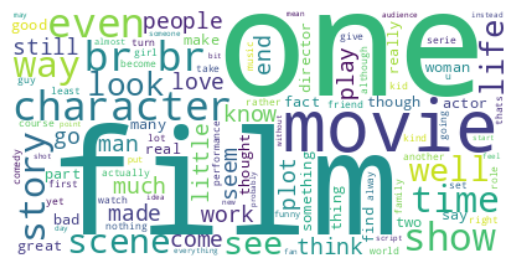

In [ ]:
text = " ".join(i for i in verisetiDf1Preprocessing["Gorus"])
worldcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
verisetiDf2Feature = verisetiDf1Preprocessing.copy()
#Terim Frekansı
tf1 = (verisetiDf2Feature["Gorus"]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf1.columns = ["Kelimeler", "Terim Frekansı"]
tf1.head()
tf1.info()
tf1.nunique()

In [ ]:
#Bar Plot (Çubuk Grafik)
ciz = tf1[tf1["Terim Frekansı"] > 200] #Terim Frekansı değeri 200'den büyük olanları al
ciz.plot.bar(x="Kelimeler", y="Terim Frekansı");

**Verisetini Eğitim-Test Veri Kümesine Bölme**

In [ ]:

train_x, test_x, train_y, test_y = model_selection.train_test_split(verisetiDf1Preprocessing["Gorus"],
verisetiDf2Preprocessing["Durumu"],
random_state = 2) #Ifade:Bağımlı, DuyguEtiketi:Bağımsız Değişken

**Öznitelik Çıkarımı**

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
HashingVector = HashingVectorizer(input='content', n_features=10000,norm=None,alternate_sign=False)
HashingVector.fit(train_x)
x_train_HashingVector = HashingVector.transform(train_x)
x_test_HashingVector = HashingVector.transform(test_x)


In [ ]:
#Count Vectorizer
countVector = CountVectorizer()
countVector.fit(train_x)



CountVectorizer()

In [ ]:
x_train_countVector = countVector.transform(train_x)
x_test_countVektor = countVector.transform(test_x)


In [ ]:
#TF-IDF "1. Word Level"
tfIdf1WordVector = TfidfVectorizer()
tfIdf1WordVector.fit(train_x)
x_train_tfIdf1WordVector = tfIdf1WordVector.transform(train_x)
x_test_tfIdf1WordVector = tfIdf1WordVector.transform(test_x)
#print(tfIdf1WordVector.get_feature_names_out()[0:5]) #['abandoned', 'abel', 'able', 'aborted', 'absolute']
#print(x_train_tfIdf1WordVector.toarray()) #Float sayılar

In [ ]:
#TF-IDF "2. N-Gram Level"
tfIdf2NgramVector = TfidfVectorizer(ngram_range=(2,3)) #2 ve 3 kelimelik gruplar oluştur
tfIdf2NgramVector.fit(train_x)
x_train_tfIdf2NgramVector = tfIdf2NgramVector.transform(train_x)
x_test_tfIdf2NgramVector = tfIdf2NgramVector.transform(test_x)
#print(tfIdf2NgramVector.get_feature_names_out()[0:5]) #['abandoned still', 'abandoned still consoled', 'abel ferrara', 'abel ferrara beaten', 'able create']
#print(x_train_tfIdf2NgramVector.toarray()) #Float sayılar

In [ ]:
#TF-IDF "3. Character Level"
tfIdf3CharVector = TfidfVectorizer(analyzer ="char", ngram_range=(2,3))
tfIdf3CharVector.fit(train_x)
x_train_tfIdf3CharVector = tfIdf3CharVector.transform(train_x)
x_test_tfIdf3CharVector = tfIdf3CharVector.transform(test_x)
#print(tfIdf3CharVector.get_feature_names_out()[0:5]) #[' a', ' ab', ' ac', ' ad', ' af']
#print(x_train_tfIdf3CharVector.toarray()) #Float sayılar

In [ ]:
#Lojistik Regresyon ile
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_countVector, train_y)
accuracy = model_selection.cross_val_score(loj_model, x_test_countVektor, test_y, cv=10).mean()
print("Lojistik Regresyon ile Count Vectors Doğruluk Oranı:", accuracy)
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tfIdf1WordVector, train_y)
accuracy = model_selection.cross_val_score(loj_model, x_test_tfIdf1WordVector, test_y, cv=10).mean()
print("Lojistik Regresyon ile Word-Level TF-IDF Doğruluk Oranı:", accuracy)
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tfIdf2NgramVector, train_y)
accuracy = model_selection.cross_val_score(loj_model, x_test_tfIdf2NgramVector, test_y, cv=10).mean()
print("Lojistik Regresyon ile N-Gram TF-IDF Doğruluk Oranı:", accuracy)
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tfIdf3CharVector, train_y)
accuracy = model_selection.cross_val_score(loj_model, x_test_tfIdf3CharVector, test_y, cv=10).mean()
print("Lojistik Regresyon ile Char-Level Doğruluk Oranı:", accuracy)


Lojistik Regresyon ile Count Vectors Doğruluk Oranı: 0.8717600000000001
Lojistik Regresyon ile Word-Level TF-IDF Doğruluk Oranı: 0.8779999999999999
Lojistik Regresyon ile N-Gram TF-IDF Doğruluk Oranı: 0.8288800000000001
Lojistik Regresyon ile Char-Level Doğruluk Oranı: 0.8466400000000001


In [ ]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_HashingVector, train_y)
accuracy = model_selection.cross_val_score(loj_model, x_test_HashingVector, test_y, cv=10).mean()
print("Naive Bayes ile Hashing Vectors Doğruluk Oranı:", accuracy)

Naive Bayes ile Hashing Vectors Doğruluk Oranı: 0.84024


In [ ]:
#Naive Bayes ile
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_countVector, train_y)
accuracy = model_selection.cross_val_score(nb_model, x_test_countVektor, test_y, cv=10).mean()
print("Naive Bayes ile Count Vectors Doğruluk Oranı:", accuracy)
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tfIdf1WordVector, train_y)
accuracy = model_selection.cross_val_score(nb_model, x_test_tfIdf1WordVector, test_y, cv=10).mean()
print("Naive Bayes ile Word-Level TF-IDF Doğruluk Oranı:", accuracy)
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tfIdf2NgramVector, train_y)
accuracy = model_selection.cross_val_score(nb_model, x_test_tfIdf2NgramVector, test_y, cv=10).mean()
print("Naive Bayes ile N-Gram TF-IDF Doğruluk Oranı:", accuracy)
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tfIdf3CharVector, train_y)
accuracy = model_selection.cross_val_score(nb_model, x_test_tfIdf3CharVector, test_y, cv=10).mean()
print("Naive Bayes ile Char-Level TF-IDF Doğruluk Oranı:", accuracy)


Naive Bayes ile Count Vectors Doğruluk Oranı: 0.85304
Naive Bayes ile Word-Level TF-IDF Doğruluk Oranı: 0.85992
Naive Bayes ile N-Gram TF-IDF Doğruluk Oranı: 0.85792
Naive Bayes ile Char-Level TF-IDF Doğruluk Oranı: 0.8187199999999999


In [ ]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_HashingVector, train_y)
accuracy = model_selection.cross_val_score(nb_model, x_test_HashingVector, test_y, cv=10).mean()
print("Naive Bayes ile Hashing Vectors Doğruluk Oranı:", accuracy)

Naive Bayes ile Hashing Vectors Doğruluk Oranı: 0.8308800000000002


In [ ]:
#Random Forest ile
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_countVector, train_y)
accuracy = model_selection.cross_val_score(rf_model, x_test_countVektor, test_y, cv=10).mean()
print("Random Forest ile Count Vectors Doğruluk Oranı:", accuracy)
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tfIdf1WordVector, train_y)
accuracy = model_selection.cross_val_score(rf_model, x_test_tfIdf1WordVector, test_y, cv=10).mean()
print("Random Forest ile Word-Level TF-IDF Doğruluk Oranı:", accuracy)
rf = ensemble.RandomForestClassifier()
rf_model = loj.fit(x_train_tfIdf2NgramVector, train_y)
accuracy = model_selection.cross_val_score(rf_model, x_test_tfIdf2NgramVector, test_y, cv=10).mean()
print("Random Forest ile N-Gram TF-IDF Doğruluk Oranı:", accuracy)
rf = ensemble.RandomForestClassifier()
rf_model = loj.fit(x_train_tfIdf3CharVector, train_y)
accuracy = model_selection.cross_val_score(rf_model, x_test_tfIdf3CharVector, test_y, cv=10).mean()
print("Random Forest ile Char-Level TF-IDF Doğruluk Oranı:", accuracy)


Random Forest ile Count Vectors Doğruluk Oranı: 0.8480000000000001
Random Forest ile Word-Level TF-IDF Doğruluk Oranı: 0.8406399999999999
Random Forest ile N-Gram TF-IDF Doğruluk Oranı: 0.8288800000000001
Random Forest ile Char-Level TF-IDF Doğruluk Oranı: 0.8466400000000001


In [ ]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_HashingVector, train_y)
accuracy = model_selection.cross_val_score(rf_model, x_test_HashingVector, test_y, cv=10).mean()
print("Naive Bayes ile Hashing Vectors Doğruluk Oranı:", accuracy)

Naive Bayes ile Hashing Vectors Doğruluk Oranı: 0.8265600000000001


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

#dt_model = dt.fit(x_train_countVector, train_y)
#accuracy = model_selection.cross_val_score(dt_model, x_test_countVektor, test_y, cv=10).mean()
#print("DecisionTreet ile Count Vectors Doğruluk Oranı:", accuracy)
#dt = ensemble.RandomForestClassifier()
#dt_model = dt.fit(x_train_tfIdf1WordVector, train_y)
#accuracy = model_selection.cross_val_score(dt_model, x_test_tfIdf1WordVector, test_y, cv=10).mean()
#print("DecisionTree ile Word-Level TF-IDF Doğruluk Oranı:", accuracy)
#dt = ensemble.RandomForestClassifier()
#dt_model = dt.fit(x_train_tfIdf2NgramVector, train_y)
#accuracy = model_selection.cross_val_score(dt_model, x_test_tfIdf2NgramVector, test_y, cv=10).mean()
#print("DecisionTree ile N-Gram TF-IDF Doğruluk Oranı:", accuracy)
dt = ensemble.RandomForestClassifier()
dt_model = dt.fit(x_train_tfIdf3CharVector, train_y)
accuracy = model_selection.cross_val_score(dt_model, x_test_tfIdf3CharVector, test_y, cv=10).mean()
print("DecisionTree ile Char-Level TF-IDF Doğruluk Oranı:", accuracy)

KeyboardInterrupt: 

In [ ]:
dt = ensemble.RandomForestClassifier()
dt_model = dt.fit(x_train_HashingVector, train_y)
accuracy = model_selection.cross_val_score(dt_model, x_test_HashingVector, test_y, cv=10).mean()
print("Naive Bayes ile Hashing Vectors Doğruluk Oranı:", accuracy)

KeyboardInterrupt: 

In [ ]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state = 10)
svm_model = svm.fit(x_train_countVector, train_y)
accuracy = model_selection.cross_val_score(svm_model, x_test_countVektor, test_y, cv=10).mean()
print("SVM ile Count Vectors Doğruluk Oranı:", accuracy)
svm = ensemble.RandomForestClassifier()
svm_model = svm.fit(x_train_tfIdf1WordVector, train_y)
accuracy = model_selection.cross_val_score(svm_model, x_test_tfIdf1WordVector, test_y, cv=10).mean()
print("SVM ile Word-Level TF-IDF Doğruluk Oranı:", accuracy)
svm = ensemble.RandomForestClassifier()
svm_model = svm.fit(x_train_tfIdf2NgramVector, train_y)
accuracy = model_selection.cross_val_score(svm_model, x_test_tfIdf2NgramVector, test_y, cv=10).mean()
print("SVM ile N-Gram TF-IDF Doğruluk Oranı:", accuracy)
svm = ensemble.RandomForestClassifier()
svm_model = svm.fit(x_train_tfIdf3CharVector, train_y)
accuracy = model_selection.cross_val_score(svm_model, x_test_tfIdf3CharVector, test_y, cv=10).mean()
print("SVM ile Char-Level TF-IDF Doğruluk Oranı:", accuracy)


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
HashingVector = HashingVectorizer()
HashingVector.fit(train_x)
x_train_HashingVector = countVector.transform(train_x)
x_test_HashingVectorr = countVector.transform(test_x)
